# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv('demo01.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6770 non-null   int64  
 1   qtd_filhos             6770 non-null   int64  
 2   tipo_renda             6770 non-null   int64  
 3   educacao               6770 non-null   int64  
 4   estado_civil           6770 non-null   int64  
 5   tipo_residencia        6770 non-null   int64  
 6   idade                  6770 non-null   float64
 7   tempo_emprego          6770 non-null   float64
 8   possui_celular         6770 non-null   int64  
 9   possui_fone_comercial  6770 non-null   int64  
 10  possui_fone            6770 non-null   int64  
 11  possui_email           6770 non-null   int64  
 12  qt_pessoas_residencia  6770 non-null   int64  
 13  sexo_M                 6770 non-null   int64  
 14  posse_de_veiculo_Y     6770 non-null   int64  
 15  poss

In [4]:
y = df.mau_True

In [5]:
x = df.drop('mau_True', axis=1)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

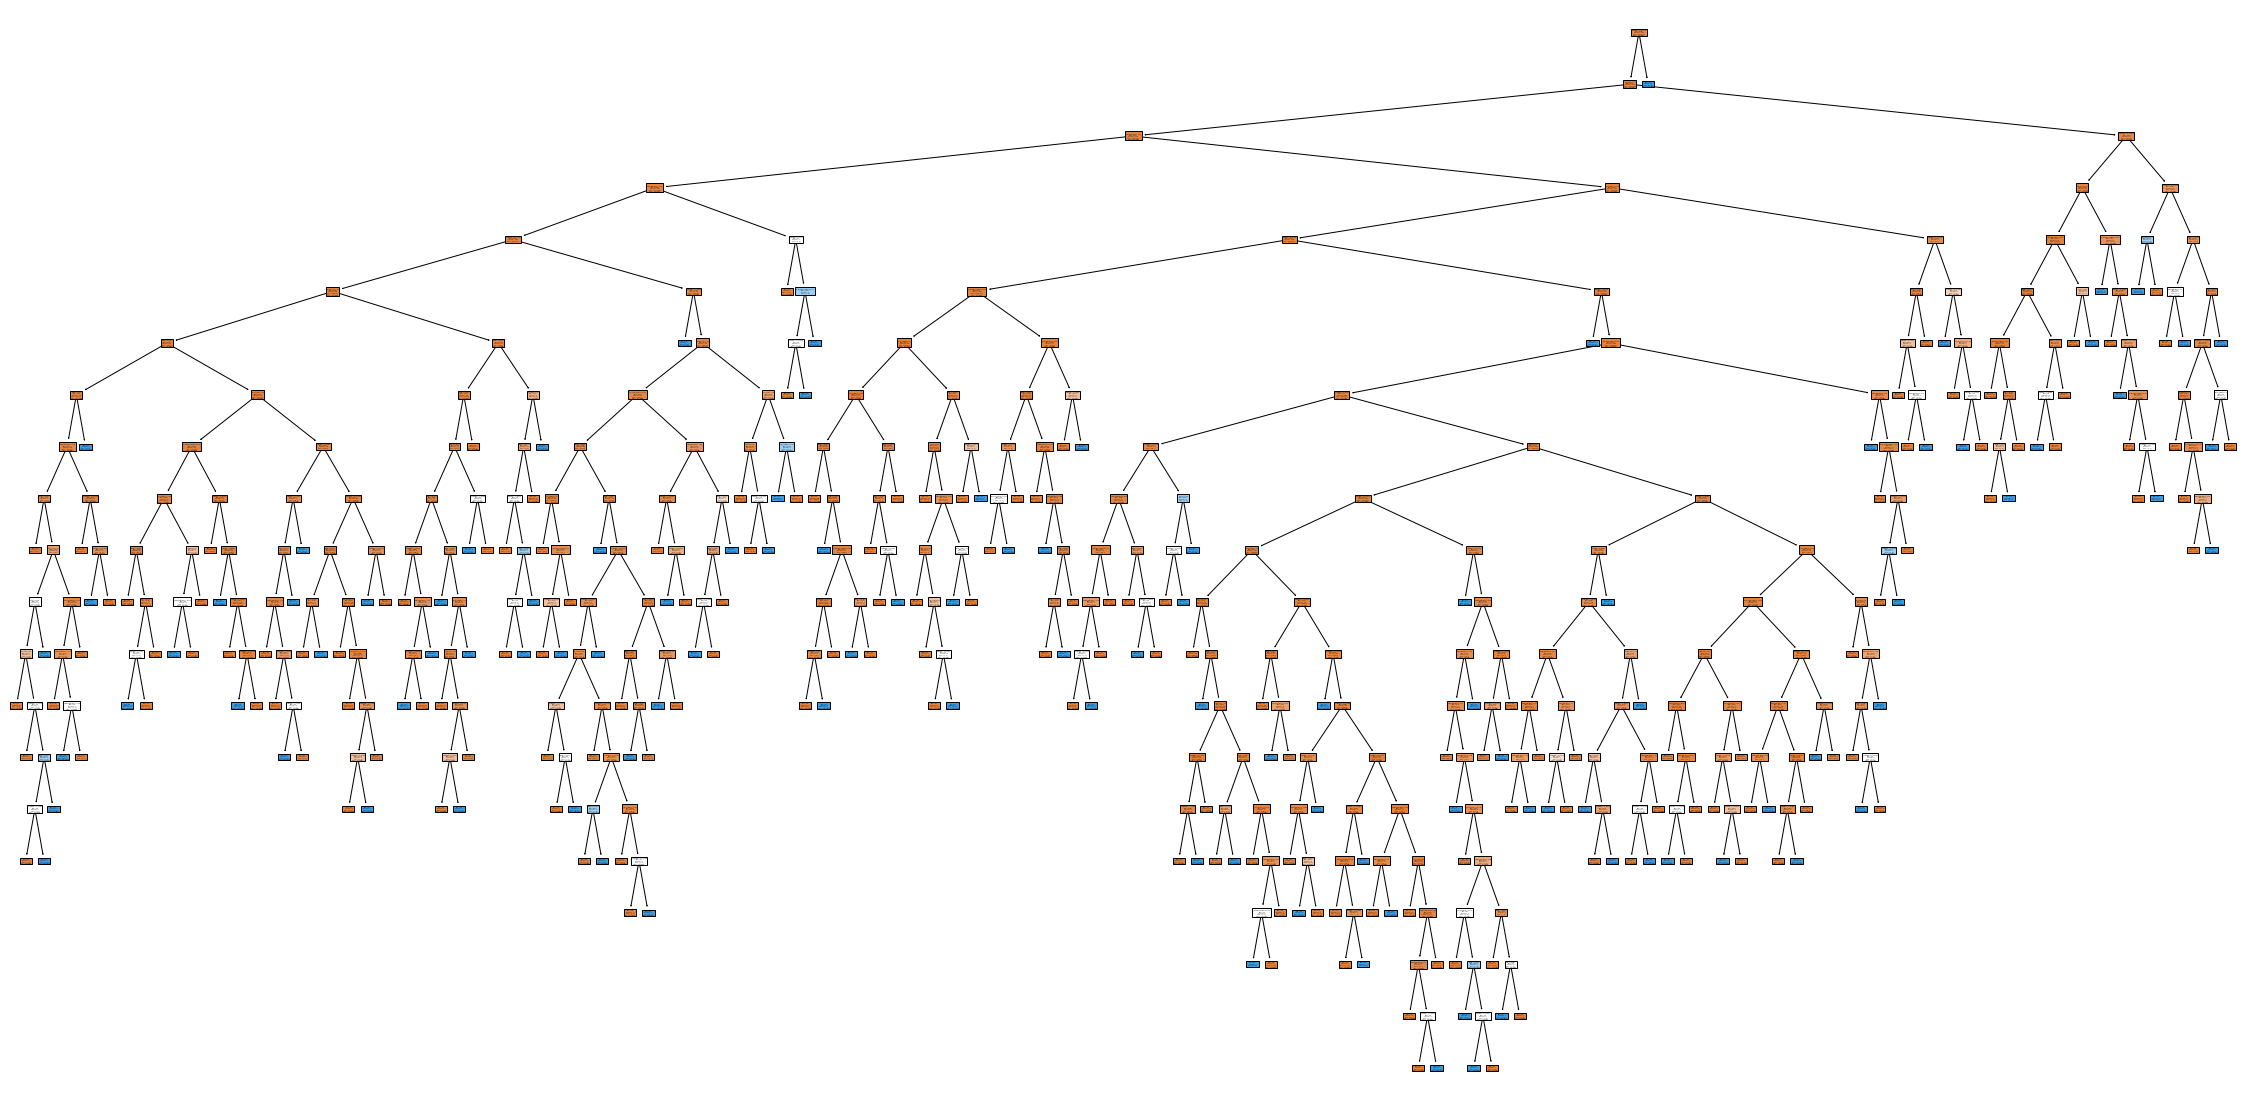

In [14]:
plt.figure(figsize=(40, 20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

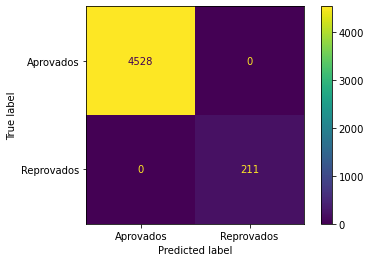

In [17]:
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [30]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [26]:
predict = clf.predict(X_test)

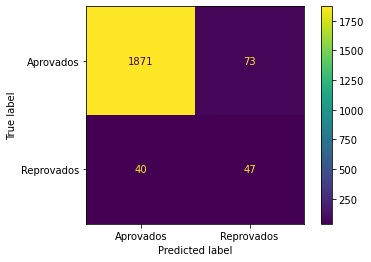

In [27]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [31]:
accuracy_score(y_test, predictions)

0.9443623830625307

In [32]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [33]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

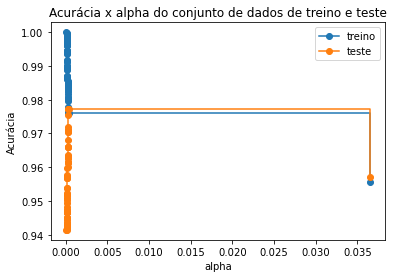

In [34]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [35]:
pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

,alpha,score
0,0.000000,0.941408
1,0.000105,0.941408
2,0.000105,0.941901
3,0.000120,0.941901
4,0.000133,0.941901
...,...,...
58,0.000270,0.975382
59,0.000278,0.977351
60,0.000281,0.977351
61,0.000357,0.977351


In [40]:
clf_podada = DecisionTreeClassifier(random_state=123, ccp_alpha=0.000270)

0.9719350073855244

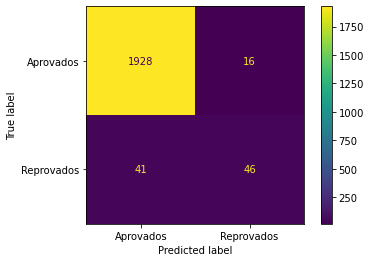

In [41]:
clf_podada.fit(X_train, y_train)
predict = clf_podada.predict(X_test)
predictions = clf_podada.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_podada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()
accuracy_score(y_test, predict)

In [48]:
df['mau_True'] = df['mau_True'] = 1
y = df.mau_True
x = df.drop('mau_True', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
accuracy_score(y_test, predictions)

# Ficaria em 100% confiável pois não teria a base não teria mais duas classificações.

1.0